   > ## Importation des librairies:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> ## Importation des algorithmes:

In [5]:
from sklearn import datasets, linear_model #sklearn est une mine d'or pour faire du machine learning dans Python.
from sklearn.metrics import mean_squared_error

> ## Importation du jeu de donnees et description:

In [10]:
#J'importe mon jeu de données.Il s'agit ici d'un jeu de données e-commerce importé depuis mon ordinateur (pas depuis sklearn)
GA = pd.read_excel (r"C:\Users\penel\OneDrive\Documents\CLIENTS\HE\ESC PAU 2021\ESC PAU 2021\2021\ML 2021\JUPYTER NOTEBOOKS\BDD Football.xlsx")

In [11]:
#Regardons à quoi ressemble le jeu de données en question.
#Vous remarquerez que des données qualitatives ont été transformées en données quantitatives, par ex: session time of day is PM etc...
#Sachez que cette manipulation est possible et utile mais ca n'est pas qqchose que nous aurons le temps d'étudier en detail.
GA.head(10)

,CLUB,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
0,Real Madrid,380,956,0.076,1080,27.605000,0.731083,884.650
1,Bayern,318,722,0.180,915,26.863333,0.952655,753.242
2,Barcelone,314,813,0.190,1060,27.258333,0.713076,966.036
3,Atlético Madrid,236,409,0.130,863,26.426667,0.706702,749.860
4,Chelsea,225,765,0.307,845,26.438333,0.963210,863.146
5,Juventus,215,630,0.000,762,28.788333,0.877659,665.198
6,Manchester U,211,1350,0.307,800,24.831667,0.954727,720.210
7,PSG,205,1272,0.137,1010,26.741667,0.936830,823.210
8,Porto,190,262,0.160,271,27.046667,0.710887,264.616
9,Manchester City,188,1297,0.083,1290,27.118333,0.920061,963.140


In [12]:
#Quelle est la taille du jeu de données?
#Ici, nous avons 200 rangées et 48 colonnes.
GA.shape

(25, 8)

In [13]:
#Ici, je vérifie que je n'ai pas de données manquantes.
GA.isnull().sum()

CLUB                   0
Perf                   0
Budget transfert       0
Joueurs formés club    0
Valeur club            0
Age équipe             0
Supporters             0
Prix équipe            0
dtype: int64

In [14]:
GA.dtypes

CLUB                    object
Perf                     int64
Budget transfert         int64
Joueurs formés club    float64
Valeur club              int64
Age équipe             float64
Supporters             float64
Prix équipe            float64
dtype: object

In [15]:
print (GA.columns)

Index(['CLUB', 'Perf', 'Budget transfert', 'Joueurs formés club',
       'Valeur club', 'Age équipe', 'Supporters', 'Prix équipe'],
      dtype='object')


In [16]:
GA.describe()
#Ici, je sors les valeurs clés pour chacune de mes données. 

,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,193.44000,542.880000,0.166400,642.400000,26.062600,0.782947,545.584560
std,62.31645,359.725743,0.101902,349.925111,1.245264,0.193850,283.367376
min,134.00000,97.000000,0.000000,52.000000,23.361667,0.090564,65.766000
25%,148.00000,286.000000,0.083000,333.000000,25.348333,0.713076,299.090000
50%,178.00000,409.000000,0.160000,688.000000,26.426667,0.770308,572.050000
75%,211.00000,722.000000,0.250000,889.000000,26.891667,0.930400,753.242000
max,380.00000,1350.000000,0.321000,1290.000000,28.788333,0.963210,966.036000


> ## Définition de la variable à prédire:

In [23]:
GAnum = GA.iloc[:,1:8]

In [24]:
GAnum.head()

,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
0,380,956,0.076,1080,27.605000,0.731083,884.650
1,318,722,0.180,915,26.863333,0.952655,753.242
2,314,813,0.190,1060,27.258333,0.713076,966.036
3,236,409,0.130,863,26.426667,0.706702,749.860
4,225,765,0.307,845,26.438333,0.963210,863.146


In [25]:
#Ici, je standardise mon jeu de données.
from sklearn.preprocessing import normalize

GAnorm = normalize(GAnum)

In [26]:
GAnorm.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [29]:
GAnorm = pd.DataFrame(data=GAnorm,columns = ['Perf', 'Budget transfert', 'Joueurs formés club', 'Valeur club', 'Age équipe', 'Supporters', 'Prix équipe'])
GAnorm.head()

,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
0,0.219097,0.551203,0.000044,0.622698,0.015916,0.000422,0.510064
1,0.223317,0.507028,0.000126,0.642564,0.018865,0.000669,0.528968
2,0.187079,0.484381,0.000113,0.631542,0.016240,0.000425,0.575559
3,0.190749,0.330578,0.000105,0.697527,0.021360,0.000571,0.606080
4,0.155428,0.528455,0.000212,0.583718,0.018263,0.000665,0.596253


In [31]:
GAnorm.describe()

,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.235703,0.512977,0.000262,0.597434,0.035127,0.000974,0.515917
std,0.137024,0.140356,0.000354,0.118382,0.025549,0.000653,0.078720
min,0.090556,0.316390,0.000000,0.275869,0.013062,0.000260,0.326944
25%,0.159815,0.410511,0.000075,0.545205,0.018263,0.000568,0.463927
50%,0.190749,0.514601,0.000163,0.629111,0.027056,0.000725,0.549190
75%,0.253260,0.554989,0.000275,0.672546,0.042068,0.001363,0.569727
max,0.721503,0.837838,0.001703,0.748546,0.129499,0.003315,0.610188


In [33]:
X = GAnorm.iloc[:,1:8]
X.head()

,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
0,0.551203,0.000044,0.622698,0.015916,0.000422,0.510064
1,0.507028,0.000126,0.642564,0.018865,0.000669,0.528968
2,0.484381,0.000113,0.631542,0.016240,0.000425,0.575559
3,0.330578,0.000105,0.697527,0.021360,0.000571,0.606080
4,0.528455,0.000212,0.583718,0.018263,0.000665,0.596253


In [34]:
Y=GAnorm.Perf
Y.head()

0    0.219097
1    0.223317
2    0.187079
3    0.190749
4    0.155428
Name: Perf, dtype: float64

> ## Exploration des donnees ou EDA: Exploratory Data Analysis:

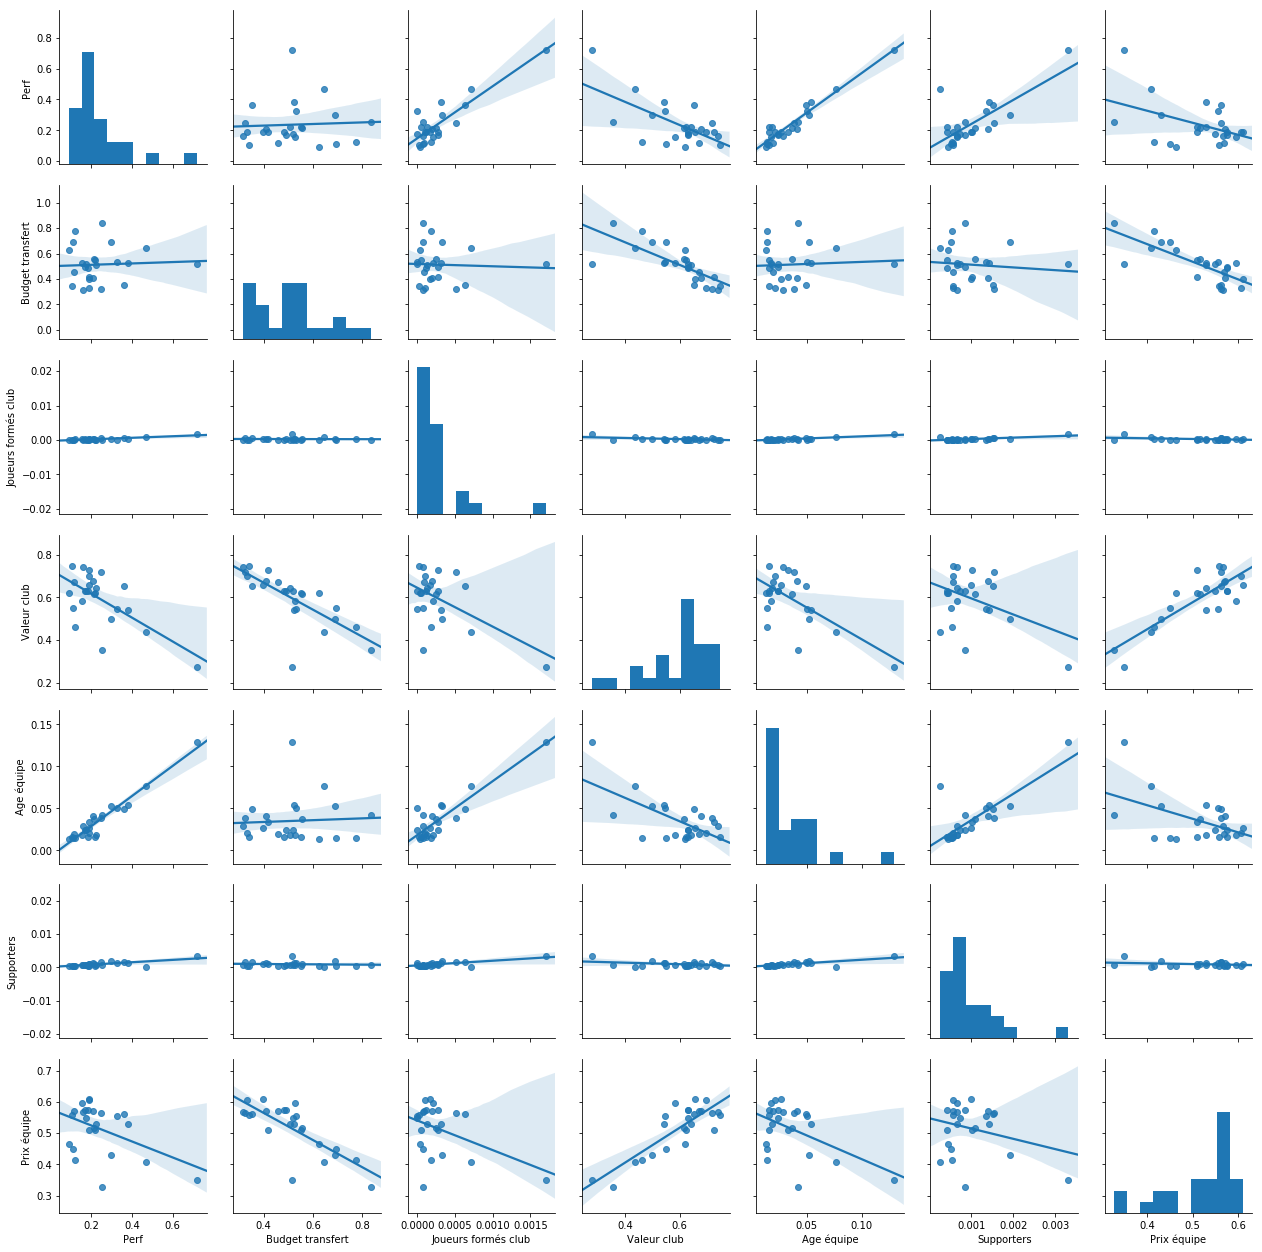

In [35]:
sns.pairplot(GAnorm, kind="reg") #Observons la linearite ou pas de toutes nos variables les unes comparees aux autres.

In [36]:
GAnorm.describe()

,Perf,Budget transfert,Joueurs formés club,Valeur club,Age équipe,Supporters,Prix équipe
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.235703,0.512977,0.000262,0.597434,0.035127,0.000974,0.515917
std,0.137024,0.140356,0.000354,0.118382,0.025549,0.000653,0.078720
min,0.090556,0.316390,0.000000,0.275869,0.013062,0.000260,0.326944
25%,0.159815,0.410511,0.000075,0.545205,0.018263,0.000568,0.463927
50%,0.190749,0.514601,0.000163,0.629111,0.027056,0.000725,0.549190
75%,0.253260,0.554989,0.000275,0.672546,0.042068,0.001363,0.569727
max,0.721503,0.837838,0.001703,0.748546,0.129499,0.003315,0.610188


> ## Demarrage de la phase de test:

In [37]:
from sklearn.model_selection import train_test_split 

> ## **C'est la ou la partie learning de Machine Learning rentre en scene!**

Remarquez aussi **split**, cela signifie que l'on va diviser notre jeu de donnee en deux: une partie pour la premiere phase qui correspond a la phase d'**l'entrainement** de la machine et l'autre partie pour **tester** si ce que la machine aura appris est fiable.

In [49]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [51]:
print (X1_train.shape)
print (X1_test.shape)
print (Y1_train.shape)
print (Y1_test.shape)

(20, 6)
(5, 6)
(20,)
(5,)


> ## Installation du modele de regression lineaire sur le jeu de donnees:

In [52]:
# On cree une instance de notre modele
lm1 = linear_model.LinearRegression()

#On fit/installe notre modele sur notre jeu de donnees.
lm1.fit(X1_train, Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print (lm1.coef_)#Interpreter la signification des coefficients
# une augmentation d'un point d'indice du prix de l'équipe se 
# traduit par une augmentation de 0,95 de l'indice de performance.

[ -0.14641961  34.27008167  -0.39160382   4.47010295 -20.81617196
   0.22375304]


In [54]:
print (lm1.intercept_) 
# sans aucune influence des facteurs budget transfert, valeur club etc... l'indice de performance est de -0,18.

0.27819336076575385


In [55]:
pred1 = lm1.predict(X1_test)
#Ici, on sort les 10 premieres valeurs predites par notre learning post apprentissage...;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
print(lm1.predict(X_test[0:10]))

[0.33092283 0.15310238 0.13163869 0.74110478 0.30751954]


> ## Evaluation du modele:

> ### 1) Calcul de l'erreur du modele:

In [56]:
print (np.sqrt(mean_squared_error(Y1_test, pred1)))

0.05403563018163695


> ### 2) Calcul du score du modele:

In [57]:
score1=lm1.score(X1_test,Y1_test)
print (score1)
## Le R2 est de 34%

0.9303230236216894


> ### 3) Calcul de l'erreur du modele de base:

In [58]:
#baseline prediction
#Ici, le modele de base/notre benchmark est le modele qui va predire que toute nouvelle observation la moyenne 
baseline=np.mean(Y1_test)
baseline

0.3600595197597782

In [59]:
baseline_pred=np.empty(len(Y1_test))# cree un nouveau tableau
baseline_pred.fill(baseline) #rempli avec predictions
print(np.sqrt(mean_squared_error(Y_test,baseline_pred)))
## Correspond à la marge d'erreur du modèle

0.2047083569790138


In [60]:
print(Y1_test, baseline_pred)
#Ici, on sort les valeurs predies versus la moyenne

8     0.380809
16    0.118017
0     0.219097
23    0.721503
11    0.360871
Name: Perf, dtype: float64 [0.36005952 0.36005952 0.36005952 0.36005952 0.36005952]


### > Interpretation ###

In [62]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.5, random_state=42) 

In [63]:
print (X2_train.shape)
print (X2_test.shape)
print (Y2_train.shape)
print (Y2_test.shape)

(12, 6)
(13, 6)
(12,)
(13,)


In [64]:
# On cree une instance de notre modele
lm2 = linear_model.LinearRegression()

#On fit/installe notre modele sur notre jeu de donnees.
lm2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
print (lm2.coef_)#Interpreter la signification des coefficients
# une augmentation d'un point d'indice du prix de l'équipe se 
# traduit par une augmentation de 0,95 de l'indice de performance.

[-3.14704112e-01  7.36909889e+01 -5.40183321e-01  3.40668557e+00
  3.63768315e+00  1.37214976e-02]


In [66]:
print (lm2.intercept_) 
# sans aucune influence des facteurs budget transfert, valeur club etc... l'indice de performance est de -0,18.

0.5552215538439336


In [70]:
pred2 = lm2.predict(X2_test)
#Ici, on sort les 10 premieres valeurs predites par notre learning post apprentissage...;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
print(lm2.predict(X2_test[0:10]))

[0.31732565 0.1307326  0.11136784 0.82775793 0.31913839 0.07838331
 0.27772921 0.1318292  0.17622302 0.14284007]


In [68]:
print (np.sqrt(mean_squared_error(Y2_test, pred2)))

0.05877056319779658


In [71]:
score2=lm2.score(X2_test,Y2_test)
print (score2)
## Le R2 est de 34%

0.8734295558943971
